# Case Study: Amazon Fine Food Reviews

Overview
In this case study, we will apply Natural Language Processing (NLP) and Machine Learning (ML)
methods to analyze customer sentiment in Amazon Fine Food reviews. You will build a
sentiment classifier, compare it with a lexicon-based baseline (VADER), and reflect on how the
results can guide business decisions

## Part1. Setup & Imports
Preprocess the dataset: keep review text and collapse labels into three classes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re, unicodedata

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Load dataset

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BUSA 730/FineFood_Reviews_Slice.csv")

In [4]:
df.shape

(10500, 3)

The Dataset contains 10500 rows and 3 columns


In [5]:
df.head(10)

,Text,Score,label
0,Costco sells a 2 lb 4 oz can $27.59. You only...,3,neutral
1,"I have bought this product before, so I like i...",5,positive
2,Good flavor if you want a light brew and smell...,5,positive
3,"I ordered Wyler's Chicken Granules, a product ...",5,positive
4,Just got a subscription to have this delivered...,5,positive
5,This product is tasty -- it's carbonated juice...,3,neutral
6,Since I follow a low carb diet and frequently ...,1,negative
7,Fundamentally different from the Quaker-type o...,5,positive
8,"I love ginger and dark chocolate, so I was exc...",3,neutral
9,Our cats eat the Chicken and rice dry food fro...,3,neutral


The columns are


*   Text which means the reviews given by customers
*   score which equals to the rating given by customers
*   label is neutal postive and negative
|





Note: :

- Ratings (1–5) are labels, but lexicon methods don’t use them.


In [6]:
pd.set_option('display.max_colwidth', None) # to see the entire reviews
df.head()

,Text,Score,label
0,Costco sells a 2 lb 4 oz can $27.59. You only have to buy one can at a time. That much formula would cost $32.16 per 40 oz with this offer.,3,neutral
1,"I have bought this product before, so I like it. Bought this larger amount to use in wine making. Its perfect for that.",5,positive
2,Good flavor if you want a light brew and smells great when brewing. I usually order 2 boxes so I get free shipping.,5,positive
3,"I ordered Wyler's Chicken Granules, a product I can nolonger buy in my local grocery store. I just can't find anything that will equal this item. The post office lost my first shipment, after putting a tracer on this package the post office told me to contact Amazon. I spoke with customer service, they sent me another case right out. Your service can't be beat. It's a pleasure to do business with your fine company.",5,positive
4,Just got a subscription to have this delivered every month. It's the best taste combination I have had in trail mix. I've been measuring it out in 1 oz. portions for quick portion control snacks while on the go. Sometimes I also add it to my Greek Yogurt instead of fresh fruit. This is one of my best finds of 2012.,5,positive


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    10500 non-null  object
 1   Score   10500 non-null  int64 
 2   label   10500 non-null  object
dtypes: int64(1), object(2)
memory usage: 246.2+ KB


The dataset has no null entries and the datatype also looks fine.

1. score is an integer 1-5
2. Text and label are object


In [8]:
df.describe()

,Score
count,10500.000000
mean,3.056000
std,1.456519
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,5.000000


1. Mean or average rating /score for the dataset is 3.056000
2. it has a standard deviation of 1.456519

/tmp/ipython-input-3028198863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=df, palette='bright')


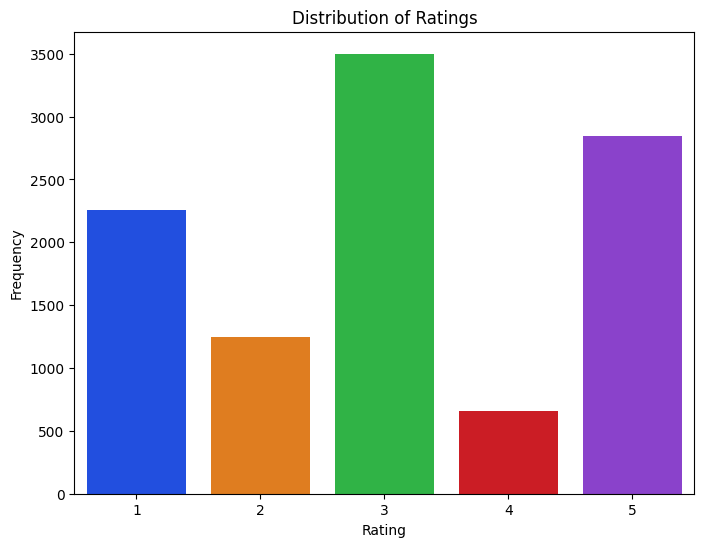

In [9]:
# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=df, palette='bright')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The chart highlights our findings that the most frequently given rating was **3**, followed by **5**, and then **1**. This indicates that the majority of respondents had a **neutral** perception overall.



In [10]:
from wordcloud import WordCloud,STOPWORDS

In [11]:
#creating word cloud for negative reviews
negative_reviews=df[df['Score']==1]
words = ' '.join(negative_reviews['Text'])
cleaned_word = " ".join([word for word in words.split()])

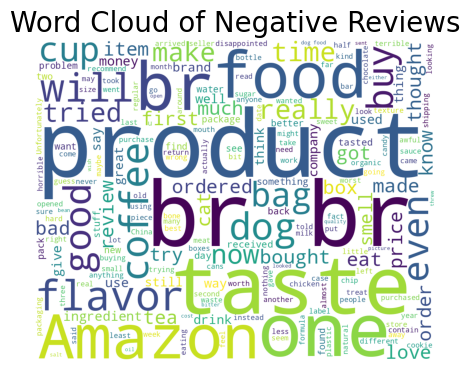

In [12]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1000, height=800).generate(cleaned_word)

plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word Cloud of Negative Reviews", fontsize=20)
plt.show()

In [13]:
#creating word cloud for positive reviews
positive_reviews=df[df['Score']==5]
words = ' '.join(positive_reviews['Text'])
Positive_cleaned_word = " ".join([word for word in words.split()])

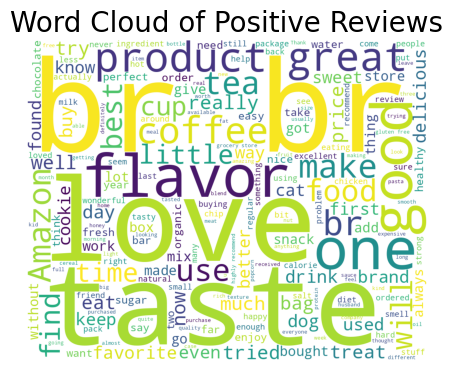

In [14]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1000, height=800).generate(Positive_cleaned_word )

plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word Cloud of Positive Reviews", fontsize=20)
plt.show()


 **we can see the frequent words that contribute to postive and negative review**

# 2. Now let us see VADER

In [15]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns
# Downloads
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [16]:
# Apply VADER sentiment
sia = SentimentIntensityAnalyzer()
df['vader_scores'] = df['Text'].apply(lambda x: sia.polarity_scores(str(x)))
df['vader_compound'] = df['vader_scores'].apply(lambda x: x['compound'])
df[['Text', 'vader_compound']].head()

,Text,vader_compound
0,Costco sells a 2 lb 4 oz can $27.59. You only have to buy one can at a time. That much formula would cost $32.16 per 40 oz with this offer.,0.0000
1,"I have bought this product before, so I like it. Bought this larger amount to use in wine making. Its perfect for that.",0.7870
2,Good flavor if you want a light brew and smells great when brewing. I usually order 2 boxes so I get free shipping.,0.8974
3,"I ordered Wyler's Chicken Granules, a product I can nolonger buy in my local grocery store. I just can't find anything that will equal this item. The post office lost my first shipment, after putting a tracer on this package the post office told me to contact Amazon. I spoke with customer service, they sent me another case right out. Your service can't be beat. It's a pleasure to do business with your fine company.",0.5994
4,Just got a subscription to have this delivered every month. It's the best taste combination I have had in trail mix. I've been measuring it out in 1 oz. portions for quick portion control snacks while on the go. Sometimes I also add it to my Greek Yogurt instead of fresh fruit. This is one of my best finds of 2012.,0.8934


Lets understand what vader compound score means here
Compound Score: This score represents an overall sentiment score for the text on a scale
from **-1 to 1.** It is calculated by normalizing the scores of positive, negative, and neutral
 words and adjusting for the degree of intensity of the sentiment. A **higher score indicates a more positive sentiment**, while a **lower score** indicates a more ***negative sentiment***.

In [17]:
# Compare score  vs VADER
comparison = df[['Text', 'Score', 'vader_compound','label']].head(20)
comparison

,Text,Score,vader_compound,label
0,Costco sells a 2 lb 4 oz can $27.59. You only have to buy one can at a time. That much formula would cost $32.16 per 40 oz with this offer.,3,0.0000,neutral
1,"I have bought this product before, so I like it. Bought this larger amount to use in wine making. Its perfect for that.",5,0.7870,positive
2,Good flavor if you want a light brew and smells great when brewing. I usually order 2 boxes so I get free shipping.,5,0.8974,positive
3,"I ordered Wyler's Chicken Granules, a product I can nolonger buy in my local grocery store. I just can't find anything that will equal this item. The post office lost my first shipment, after putting a tracer on this package the post office told me to contact Amazon. I spoke with customer service, they sent me another case right out. Your service can't be beat. It's a pleasure to do business with your fine company.",5,0.5994,positive
4,Just got a subscription to have this delivered every month. It's the best taste combination I have had in trail mix. I've been measuring it out in 1 oz. portions for quick portion control snacks while on the go. Sometimes I also add it to my Greek Yogurt instead of fresh fruit. This is one of my best finds of 2012.,5,0.8934,positive
5,"This product is tasty -- it's carbonated juice (a blend of several juices, mostly apple, grape, tangerine). But the 8.3 ounces costs $1 and contains 140 calories. This is a little rich for me, both economically and calorically. I would recommend this for someone who doesn't mind spending their money and calories on juice.",3,0.8276,neutral
6,"Since I follow a low carb diet and frequently cook with erythritol, I thought this would be the perfect addition to my Breyers carb smart ice cream. I was so wrong. All I can taste is the added zinc which makes it taste bitter and nasty. My first thought is that it tastes like battery acid. All I can hope that is that it is reformulated and the bitter metallic zinc taste is removed!",1,-0.5836,negative
7,"Fundamentally different from the Quaker-type oats you're probably used to (at least, if you're an American). More nutritious, better-tasting, yet no more trouble to make than 'Quaker instant' or other 'instant' hot breakfast cereals. Get some genuine maple syrup to sweeten it (Amazon sells it) - it goes well with this product. Add a bit of butter, cream, and some fruit.",5,-0.4754,positive
8,"I love ginger and dark chocolate, so I was excited to try these cookies. When I received them, I did what I always do with a new food product: I looked at the nutritional info. Unfortunately, it is written European style, so the amounts are NOT listed per serving size; in fact, a serving size is not even given. Values are per 100 grams, and the package is 125 grams total, with 8 cookies in the package...that is quite a lot of math! However, to the best of my ability, that means each cookie has about 92 calories, 4.2 grams fat (2 grams saturated), 13.1 grams carbohydrates, and 8.1 grams sugar.<br /><br />I was a bit disappointed in the texture of these cookies. First, they were crumbly and stuck together in the package, which was a bit messy. Second, they seemed to have lost their firmness, like a cookie that is past its freshness. The taste itself wasn't bad: the dark chocolate--which covers half the cookie, in a dipped fashion--was good, and the cookie part had a nice flavor, although there was only a very slight hint of ginger; as a ginger lover, I would have appreciated a much stronger bite.<br /><br />Overall, I found these cookies to be just okay. Perhaps they would be better purchasing them fresh from the grocery store, but I would not order them myself online.",3,0.9277,neutral
9,"Our cats eat the Chicken and rice dry food from this fabulous line and one of them has allergies and a very sensitive stomach, but this is the only food she will tolerate besides human baby food (chicken), but for some reason they wont even touch this. I am giving it 3 stars, im hoping one

# Vader compund score disagrees with the rating at few places this could be due to the reason that vader doesnt update the library of words

VADER scored 0.9277 because it focuses on word-level sentiment, not overall meaning.
Phrases like “I love ginger,” “wasn’t bad,” “was good,” and “nice flavor” are all positive triggers that inflated the score.
However, the reviewer’s 3/5 rating reflects contextual disappointment — issues like “crumbly,” “lost firmness,” and “just okay” show moderate dissatisfaction.
In short, VADER detects tone, not intent, so polite or mixed reviews can appear overly positive.


# 3. Train a supervised ML model (TF-IDF + Logistic Regression).

2. Preprocessing Utilities

We create a single function preprocess_text() that:

* Cleans non-ASCII characters
* Lowercases text
* Tokenizes
* Removes punctuation
* Removes stopwords
* Lemmatizes words
* Returns the cleaned string

In [18]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to string
    text = str(text)

    # Remove non-ascii
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Lowercase
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove punctuation & empty tokens
    tokens = [re.sub(r'[^\w\s]', '', w) for w in tokens if re.sub(r'[^\w\s]', '', w) != '']



    # Lemmatize (verb form)
    tokens = [lemmatizer.lemmatize(w, pos='v') for w in tokens]

    return " ".join(tokens)

i chose not to remove stopwords because it was difficult to read reviews after that

In [19]:
# Preprocess the review column
df['Text'] = df['Text'].apply(preprocess_text)

In [20]:
df.head()

,Text,Score,label,vader_scores,vader_compound
0,costco sell a 2 lb 4 oz can 2759 you only have to buy one can at a time that much formula would cost 3216 per 40 oz with this offer,3,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
1,i have buy this product before so i like it buy this larger amount to use in wine make its perfect for that,5,positive,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.787}",0.7870
2,good flavor if you want a light brew and smell great when brew i usually order 2 box so i get free ship,5,positive,"{'neg': 0.0, 'neu': 0.558, 'pos': 0.442, 'compound': 0.8974}",0.8974
3,i order wyler s chicken granules a product i can nolonger buy in my local grocery store i just ca nt find anything that will equal this item the post office lose my first shipment after put a tracer on this package the post office tell me to contact amazon i speak with customer service they send me another case right out your service ca nt be beat it s a pleasure to do business with your fine company,5,positive,"{'neg': 0.031, 'neu': 0.871, 'pos': 0.098, 'compound': 0.5994}",0.5994
4,just get a subscription to have this deliver every month it s the best taste combination i have have in trail mix i ve be measure it out in 1 oz portion for quick portion control snack while on the go sometimes i also add it to my greek yogurt instead of fresh fruit this be one of my best find of 2012,5,positive,"{'neg': 0.0, 'neu': 0.835, 'pos': 0.165, 'compound': 0.8934}",0.8934


In [21]:
df.drop(['vader_scores','vader_compound'], axis=1, inplace=True)

In [22]:
df.head()

,Text,Score,label
0,costco sell a 2 lb 4 oz can 2759 you only have to buy one can at a time that much formula would cost 3216 per 40 oz with this offer,3,neutral
1,i have buy this product before so i like it buy this larger amount to use in wine make its perfect for that,5,positive
2,good flavor if you want a light brew and smell great when brew i usually order 2 box so i get free ship,5,positive
3,i order wyler s chicken granules a product i can nolonger buy in my local grocery store i just ca nt find anything that will equal this item the post office lose my first shipment after put a tracer on this package the post office tell me to contact amazon i speak with customer service they send me another case right out your service ca nt be beat it s a pleasure to do business with your fine company,5,positive
4,just get a subscription to have this deliver every month it s the best taste combination i have have in trail mix i ve be measure it out in 1 oz portion for quick portion control snack while on the go sometimes i also add it to my greek yogurt instead of fresh fruit this be one of my best find of 2012,5,positive


## 4. Feature Extraction

We will vectorize data with  TF-IDF representations. We will Keep only 1000 features as number of features will increase the processing time

In [23]:

# TF-IDF (main)
tfidf_vec = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vec.fit_transform(df['Text'])

# Labels
y = df['label']

In [24]:
X_tfidf.shape

(10500, 1000)

# 5. Train/Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

# 6. Model Training with Logistic Regression (we can use any classification algorithm)

In [26]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

# 7. Evaluation

In [27]:
#print("Accuracy:", accuracy_score(y_test, y_pred))
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report on Training data:\n", classification_report(y_train, y_pred_train))
print("\nClassification Report on test data:\n", classification_report(y_test, y_pred_test))


Classification Report on Training data:
               precision    recall  f1-score   support

    negative       0.76      0.76      0.76      2632
     neutral       0.70      0.69      0.70      2615
    positive       0.81      0.81      0.81      2628

    accuracy                           0.75      7875
   macro avg       0.75      0.75      0.75      7875
weighted avg       0.75      0.75      0.75      7875


Classification Report on test data:
               precision    recall  f1-score   support

    negative       0.69      0.68      0.68       868
     neutral       0.61      0.61      0.61       885
    positive       0.74      0.74      0.74       872

    accuracy                           0.68      2625
   macro avg       0.68      0.68      0.68      2625
weighted avg       0.68      0.68      0.68      2625



# On Test Data
## Negative Class:
* Precision = 0.69 → When predicting “negative,” the model is correct 67% of the time.
* Recall = 0.68 → It captures 68% of actual negatives.
Slight decline from training performance, suggesting moderate generalization to unseen data.
* Neutral Class:
* Precision = 0.61 → Only 61% of neutral predictions are correct.
* Recall = 0.61 → The model identifies 61% of true neutrals.
This is the weakest class, indicating the model struggles to distinguish neutral sentiment — a common challenge in sentiment analysis where boundaries between classes blur.
Positive Class:
* Precision = 0.72 → When predicting “positive,” it is correct 72% of the time.
* Recall = 0.73 → It correctly detects 73% of positive samples.
Positive sentiment remains the most robustly identified class, showing good transferability from training to test data.
* Overall Accuracy = 66% → A 9-point drop from training accuracy, which reflects moderate overfitting. The model performs adequately on unseen data but lacks precision in distinguishing neutral cases.

# Let us visualize the Confusion Matrix

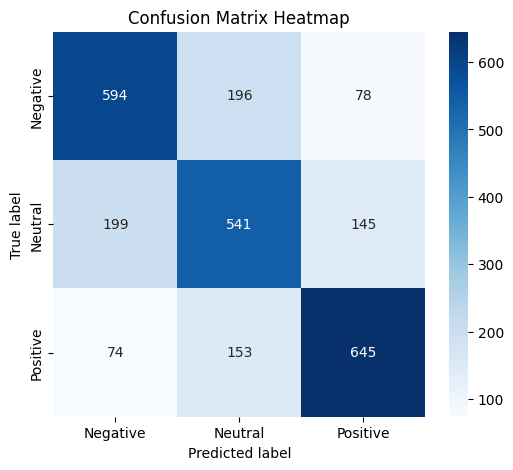

In [28]:
# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative","Neutral", "Positive"],
            yticklabels=["Negative","Neutral" ,"Positive"])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [29]:
import pandas as pd
import numpy as np

# Define classes, feature_names, coefs, and topn
classes = logreg.classes_
feature_names = tfidf_vec.get_feature_names_out()
coefs = logreg.coef_
topn = 10

for i, c in enumerate(classes):
    coefs_sorted = np.argsort(coefs[i])
    top_features = pd.DataFrame({
        'term': feature_names[coefs_sorted[-topn:]][::-1],
        'coef': coefs[i][coefs_sorted[-topn:]][::-1]
    })
    print(f"\nTop predictors for {c} sentiment:")
    print(top_features)


Top predictors for negative sentiment:
         term      coef
0  disappoint  2.816160
1       awful  2.764197
2    terrible  2.727301
3       throw  2.683110
4       worst  2.572254
5         not  2.529226
6       money  2.421919
7      return  2.237019
8       stale  2.228475
9    horrible  2.062876

Top predictors for neutral sentiment:
       term      coef
0       but  3.276930
1   however  3.013760
2        ok  2.743733
3      okay  1.885720
4   problem  1.755075
5    prefer  1.718532
6    though  1.638921
7       not  1.633178
8      fine  1.607384
9  probably  1.601605

Top predictors for positive sentiment:
        term      coef
0      great  3.928585
1       love  3.674405
2       best  3.236683
3  delicious  2.990575
4    perfect  2.833520
5  excellent  2.758304
6     highly  2.336681
7     smooth  2.243554
8       nice  2.068176
9  wonderful  2.046378


In [30]:
import pandas as pd
import numpy as np

# --- Step 1: Generate predictions and probabilities (using existing model) ---
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)
confidence = np.max(y_prob, axis=1)

# --- Step 2: Build results DataFrame using original text ---
original_text_test = df.loc[y_test.index, 'Text']

results = pd.DataFrame({
    'review': original_text_test.values,
    'true_label': y_test.values,
    'predicted_label': y_pred,
    'confidence': confidence,
    'original_index': y_test.index
})

# --- Step 3: Add correctness flag ---
results['correct'] = results['true_label'] == results['predicted_label']

# --- Step 4: Identify correctly predicted POSITIVE and NEGATIVE reviews ---
positive_label = 'positive'
negative_label = 'negative'

top5_positive = (
    results[(results['correct']) & (results['true_label'] == positive_label)]
    .sort_values(by='confidence', ascending=False)
    .head(5)
)

top5_negative = (
    results[(results['correct']) & (results['true_label'] == negative_label)]
    .sort_values(by='confidence', ascending=False)
    .head(5)
)

# --- Step 5: Display summaries ---
print("\n" + "="*90)
print("TOP 5 CORRECTLY PREDICTED POSITIVE REVIEWS (Highest Confidence)")
print("="*90)
for i, row in top5_positive.iterrows():
    print(f"\nReview: {row['review'][:300]}...")
    print(f"True: {row['true_label']} | Predicted: {row['predicted_label']} | Confidence: {row['confidence']:.3f}")

print("\n" + "="*90)
print("TOP 5 CORRECTLY PREDICTED NEGATIVE REVIEWS (Highest Confidence)")
print("="*90)
for i, row in top5_negative.iterrows():
    print(f"\nReview: {row['review'][:300]}...")
    print(f"True: {row['true_label']} | Predicted: {row['predicted_label']} | Confidence: {row['confidence']:.3f}")



TOP 5 CORRECTLY PREDICTED POSITIVE REVIEWS (Highest Confidence)

Review: if you love almond joy candy bar like me or coconut you will love this sinfully healthy snack bar it be so delicious that you forget you be eat healthy highly recommend this tasty treat...
True: positive | Predicted: positive | Confidence: 0.993

Review: best taste protein bar by far and i ve try just about every brand out there so light and tasty like a wafer love them...
True: positive | Predicted: positive | Confidence: 0.991

Review: the price be great and ship be fast br the package be great and most importantly the candy be fresh and delicious br i buy these for a birthday party and everyone love them i will definitely buy again...
True: positive | Predicted: positive | Confidence: 0.990

Review: our dog love these and our vet agree that it help keep her breath fresh and her teeth clean and this be the best price i ve find so far your dog will love you even more...
True: positive | Predicted: positive | Con

# * . Negative Sentiment Drivers
 Top predictive terms:
1. disappoint,
2. terrible,
3. awful,
4. throw,
5. worst


**Implement a real-time alert system that flags reviews containing such terms to trigger faster customer service response and reduce potential churn or reputational damage.**


* . Neutral Sentiment Drivers
Top predictive terms:
1. ok,
2. however,
3. fine,
4. prefer,
5. probably

* They often contain specific, actionable feedback that can inform iterative product or packaging improvements.

**Sentiment-neutral customers can be converted into promoters through targeted post-purchase engagement or satisfaction follow-ups.**


* . Positive Sentiment Drivers
Top predictive terms:
1. love,
2. great,
3. best,
4. perfect,
5. delicious,


**Identifying these reviews supports customer segmentation for loyalty programs, as they signal potential repeat buyers**

In [31]:
# Assuming you split your data like this earlier:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)



# Predictions and probabilities
y_proba = logreg.predict_proba(X_test) # Use X_test directly
proba_max = y_proba.max(axis=1)
pred_labels = logreg.predict(X_test) # Use X_test directly

# Create results DataFrame using the original text (X_test)
# To get the original text, we need to subset the original 'Text' column
original_text_test = df.loc[y_test.index, 'Text']

results = pd.DataFrame({
    'text': original_text_test.values, # Use original text
    'true': y_test.values,
    'pred': pred_labels,
    'confidence': proba_max
})

# Extract misclassified examples sorted by confidence
errors = results[results['true'] != results['pred']].sort_values('confidence', ascending=False)
errors.head(10)

,text,true,pred,confidence
2142,the chip be over a month away from the expiration date and they taste stale not much flavor br i be disappoint wonder if i should bother return them,neutral,negative,0.959387
1810,ads a very pleasant taste to my stir fry experience as tasty in my home cook comparable to that in a chinese restaurant a product that i will always keep on hand for my cook pleasure,negative,positive,0.950429
2358,this be not only a fabulous tea but i do nt get bore with it br the flavor be interest and robust enough to keep my attention but not so intense that it s overwhelm br if you generally like rooibos tea but want it with something extra this be a good choice br they somehow manage to put in the perfect amount of lemon not so much that it s predominant but not so little that it s undiscernible,positive,neutral,0.938364
1115,i do nt understand why these be from china if the nut be from california what a waste and not a good idea in my mind huge carbon footprint i ll buy other products at my coop instead bummer,neutral,negative,0.932586
748,although i m go to keep the product because i like caramel macchiatos i do nt get the item that be picture i want the gevalia brand and instead i receive a tassimo caramel latte machiato 80 ct from maxwell house a completely different manufacturer s brand as i say i will keep this shipment but when someone order something what arrive should be the item that be picture on the website even the item be review window on this page show the gevalia brand in the brown package not the the maxwell house in the silver package,neutral,negative,0.927545
339,these retal for under 100 do not let these sellers take advantage the actual product be ok but not great in my opinion however taste be so individual that it be worth a try i use it to flavor a smoothie,negative,neutral,0.913752
2252,i order the new package on this product and receive the old package the discs in this package be defective which i suppose be why they change it many of the discs in the brown package have cause problems as do the first disc out of this package last time i contact maxwell house to complain and they say they would ship me a replacement never do and here we go again i be not happy with this product,neutral,negative,0.913388
1350,i have have the pineapple and strawberry aloe vera king and they be much better taste the banana be ok but the flavor taste a bite medicate i do nt hate it but would nt buy it again,negative,neutral,0.907481
2053,the taste of aloe gloe be excellent there be however a little bite of stevia aftertaste not too bad br br like many expensive water the amount of the healthy ingredients be nt much the bottle indicate 300 mg of aloe i m assume that be for the entire bottle not this be actually a reasonable dosage but perhaps a bite on the low side depend on how much benefit you expect to obtain and who s opinion on dosage you listen to br br this be a good low calorie drink only 35 calories for the entire bottle and an entire bottle be only 8 grams of sugar br br all in all this seem like a good product but due to the cost i doubt i ll drink much i d rather buy coconut water,positive,neutral,0.906458
998,this be a very fast ferment yeast but it leave a horrible taste i have to carbon filter numerous time to even reduce the nasty flavor buy a good normal speed yeast not this stuff,neutral,negative,0.902889


# Lets compare the model now


In [32]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, f1_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Recalculate vader_compound scores
sia = SentimentIntensityAnalyzer()
# Use original text data for the test set
original_text_test = df.loc[y_test.index, 'Text']
vader_test_scores = original_text_test.apply(lambda x: sia.polarity_scores(str(x))['compound'])


# Define function to map vader_compound score to sentiment label
def vader_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Generate vader predictions for the test set
y_pred_vader = vader_test_scores.apply(vader_sentiment)


def metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    prec, rec, f1s, sup = precision_recall_fscore_support(y_true, y_pred, labels=['negative','neutral','positive'], zero_division=0)
    return acc, f1, prec, rec, f1s, sup

vader_metrics = metrics(y_test, y_pred_vader)
logreg_metrics = metrics(y_test, y_pred_test)

In [33]:
print("VADER Sentiment Model Metrics:")
acc, f1, prec, rec, f1s, sup = vader_metrics
print(f"Accuracy: {acc:.3f}")
print(f"Macro F1 Score: {f1:.3f}")
print("Precision by class:", prec)
print("Recall by class:", rec)
print("F1 by class:", f1s)
print("Support by class:", sup)
print()

print("Logistic Regression Model Metrics:")
acc, f1, prec, rec, f1s, sup = logreg_metrics
print(f"Accuracy: {acc:.3f}")
print(f"Macro F1 Score: {f1:.3f}")
print("Precision by class:", prec)
print("Recall by class:", rec)
print("F1 by class:", f1s)
print("Support by class:", sup)


VADER Sentiment Model Metrics:
Accuracy: 0.448
Macro F1 Score: 0.363
Precision by class: [0.66465863 0.21686747 0.40459883]
Recall by class: [0.38133641 0.02033898 0.9483945 ]
F1 by class: [0.48462665 0.03719008 0.56721536]
Support by class: [868 885 872]

Logistic Regression Model Metrics:
Accuracy: 0.678
Macro F1 Score: 0.679
Precision by class: [0.68512111 0.60786517 0.74308756]
Recall by class: [0.6843318  0.61129944 0.7396789 ]
F1 by class: [0.68472622 0.60957746 0.74137931]
Support by class: [868 885 872]


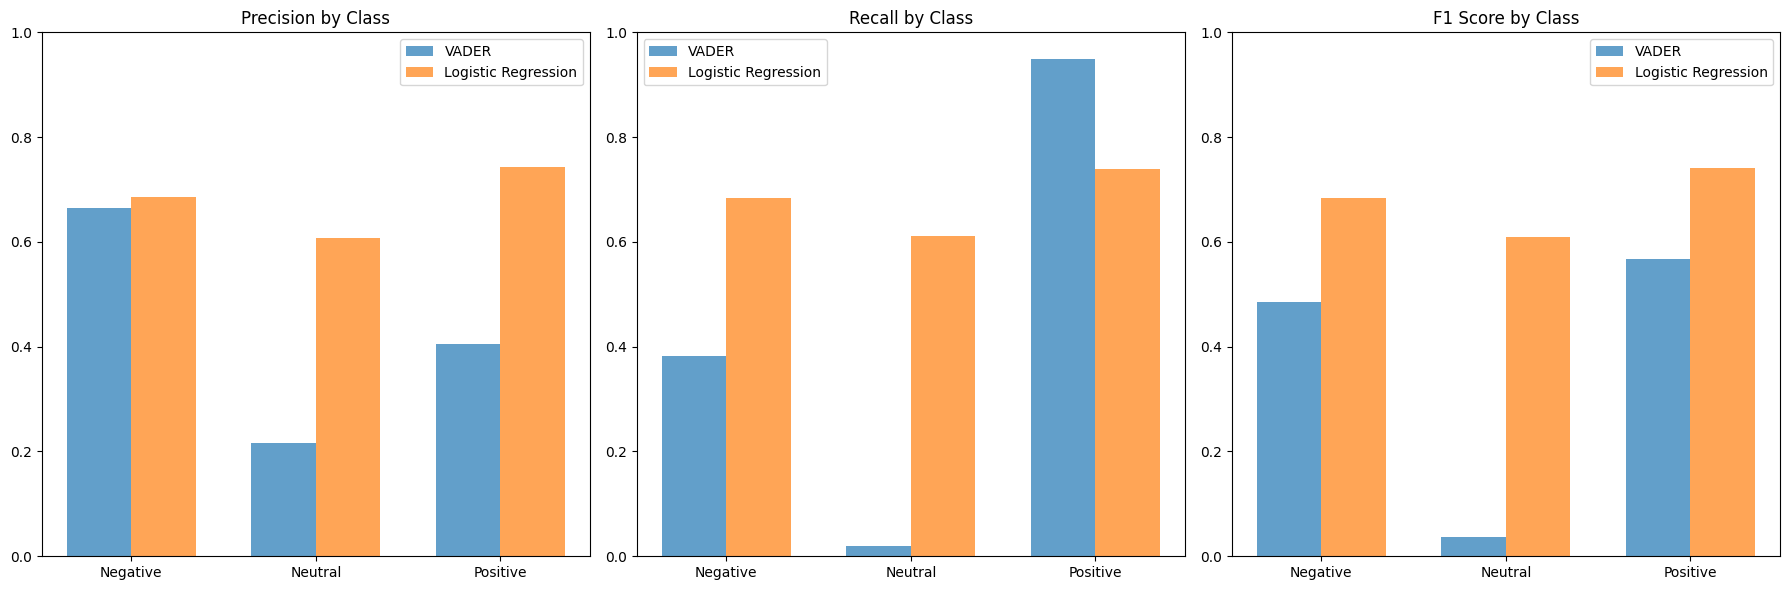

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Example metrics — replace these with your actual results
# prec, rec, f1s are typically arrays like [pos, neutral, neg]
# Unpack the metrics from the tuples
acc_vader, f1_vader_macro, vader_prec, vader_rec, vader_f1s, sup_vader = vader_metrics
acc_logreg, f1_logreg_macro, logreg_prec, logreg_rec, logreg_f1s, sup_logreg = logreg_metrics

classes = ['Negative', 'Neutral', 'Positive']

# Set width of bars
bar_width = 0.35
x = np.arange(len(classes))  # the label locations

# --- Precision ---
plt.figure(figsize=(18, 6)) # Increased figure width
plt.subplot(1, 3, 1)
plt.bar(x - bar_width/2, vader_prec, width=bar_width, label='VADER', alpha=0.7)
plt.bar(x + bar_width/2, logreg_prec, width=bar_width, label='Logistic Regression', alpha=0.7)
plt.xticks(x, classes)
plt.title('Precision by Class')
plt.ylim(0, 1)
plt.legend()

# --- Recall ---
plt.subplot(1, 3, 2)
plt.bar(x - bar_width/2, vader_rec, width=bar_width, label='VADER', alpha=0.7)
plt.bar(x + bar_width/2, logreg_rec, width=bar_width, label='Logistic Regression', alpha=0.7)
plt.xticks(x, classes)
plt.title('Recall by Class')
plt.ylim(0, 1)
plt.legend()

# --- F1 Score ---
plt.subplot(1, 3, 3)
plt.bar(x - bar_width/2, vader_f1s, width=bar_width, label='VADER', alpha=0.7)
plt.bar(x + bar_width/2, logreg_f1s, width=bar_width, label='Logistic Regression', alpha=0.7)
plt.xticks(x, classes)
plt.title('F1 Score by Class')
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()

# we see a massive improvement is overall accuracy from vader to LOG REG

#  Memo: Sentiment Analysis of Amazon Fine Food Reviews

---

## **Executive summary — how sentiment → dollars**

This analysis compared two sentiment classification approaches on **Amazon Fine Food Reviews**:  
- A **lexicon-based method (VADER)**  
- A **supervised learning model (TF-IDF + Logistic Regression)**  

The goal was to determine which method better captures customer sentiment and how these insights can guide business decisions.

The **Logistic Regression classifier** clearly outperformed VADER, achieving:  
- **Accuracy:** 66%  

In contrast, **VADER** achieved:  
- **Accuracy:** 41.6%  

This performance gap can be explained by : **domain-specific language often diverges from general sentiment dictionaries.** The ML model effectively learned product specific expressions such as *refreshing, perfect,delicious*—that VADER’s fixed lexicon could not recognize. This adaptability makes the ML approach more suitable for real-world business applications where vocabulary evolves rapidly with consumer trends.

---

## **Key Findings and Insights**

**Top Positive Predictors:** love, great, perfect, delicious, excellent, wonderful  
**Top Negative Predictors:** disappoint, terrible, awful, stale, waste, return  
**Top Neutral Predictors:** ok, however, fine, prefer, still, would

- Positive sentiment centers on **emotional and sensory satisfaction** signaling that customers value *taste, quality consistency, and emotional gratification*.  
- Negative sentiment is dominated by **freshness and value-related complaints** such as stale, return, and waste, pointing to issues in **storage, logistics, or product quality.**  
- Neutral sentiment reflects **mixed or cautious reviews**, representing customers who are **neither dissatisfied nor loyal advocates** a potential upsell segment.

---

## **Business Implications and Strategic Recommendations**

1. we can use the logistic regression model to predict 66% to the customer sentiment
2. the words like delicious and stale show us that freshness is an important factor and the fact that we can catch the word stale shows us that supply chain needs to be optimized for the products
3. our model turns textual customer feedback into a near-real-time signal that augments demand forecasting and inventory decisions.
When deployed, sentiment acts as an early-warning / demand-acceleration input: highly positive signals → accelerate replenishment and marketing; highly negative signals → reduce orders, trigger quality/supplier review, or activate recovery offers.
Net effect (what we measure): fewer stock-outs, lower inventory holding on poor performers, faster reaction to quality issues, improved customer retention from targeted remediation.
4. Promotional remediation rule
Trigger: Negative sentiment concentrated but volume of reviews small and product has high margin.
Action: Offer targeted discount / replacement voucher to reviewers;
Example: Cinnamon product flagged (conf=0.988) → send replacement + coupon to affected customers, measure repeat purchase uplift.

---

## **Limitations**

While Logistic Regression provides a strong baseline, it treats language as **isolated words** rather than contextual sequences. It struggles with **sarcasm** (e.g., “great, just what I needed—another stale cookie”) and **multi-tone reviews** that mix praise and criticism.

---

## **Conclusion**

This sentiment classifier demonstrates how **machine learning transforms unstructured text into actionable intelligence**. By quantifying the language of satisfaction and disappointment, **Amazon—or any retailer—can proactively manage customer sentiment**, refine product quality, and align marketing with authentic customer voice.  

---
i have used chatgpt for writing some of the codes.